In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Literacy rates.csv")

In [3]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791


In [4]:
#Information about the data

In [5]:
df.isnull().sum()

index            0
Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4955 non-null   int64  
 1   Region         4955 non-null   object 
 2   Country        4955 non-null   object 
 3   Year           4955 non-null   int64  
 4   Age            4955 non-null   object 
 5   Gender         4955 non-null   object 
 6   Literacy rate  4955 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 271.1+ KB


In [7]:
#basic statistics of the data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,4955.0,2477.000000,1430.529622,0.000000,1238.500000,2477.000000,3715.500000,4954.0
Year,4955.0,2013.987891,2.746204,2010.000000,2011.000000,2014.000000,2016.000000,2018.0
Literacy rate,4955.0,0.816947,0.232560,0.004025,0.722507,0.930676,0.985078,1.0


In [9]:
df.columns

Index(['index', 'Region', 'Country', 'Year', 'Age', 'Gender', 'Literacy rate'], dtype='object')

# Questions:

In [10]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791


In [11]:
# 1. Country wise top 5 average Literacy rate?
# 2. Region wise average Literacy rate?
# 3. Create a new column Age_Group and find Age_group wise Literacy rate?
# 4. Gender wise Literacy rate?
# 5. Year wise average Literacy rate ?



# <h4>Q1. Country wise top 5 average Literacy rate?</h4>

In [12]:

top5=df.sort_values(by=['Literacy rate','Country'],ascending=False).head(5)
top5

,index,Region,Country,Year,Age,Gender,Literacy rate
422,422,Central and Southern Asia,Uzbekistan,2013,15-24,female,1.0
423,423,Central and Southern Asia,Uzbekistan,2013,15-24,male,1.0
424,424,Central and Southern Asia,Uzbekistan,2013,15-24,total,1.0
425,425,Central and Southern Asia,Uzbekistan,2013,25-64,female,1.0
426,426,Central and Southern Asia,Uzbekistan,2013,25-64,male,1.0


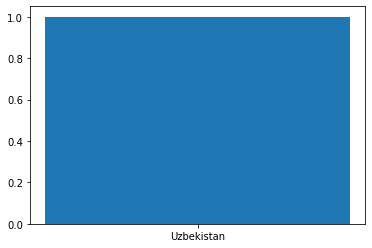

In [13]:
plt.bar(top5['Country'],top5['Literacy rate'])
plt.show()

# <h4>Q2. Region wise average Literacy rate?</h4>

In [14]:
region_literacy_rate=df.groupby('Region')['Literacy rate'].mean().reset_index()
region_literacy_rate

,Region,Literacy rate
0,Central and Southern Asia,0.717532
1,Eastern and South-Eastern Asia,0.882141
2,Europe and Northern America,0.979013
3,Latin America and the Caribbean,0.906581
4,Northern Africa and Western Asia,0.851144
5,Oceania,0.911783
6,Sub-Saharan Africa,0.616073


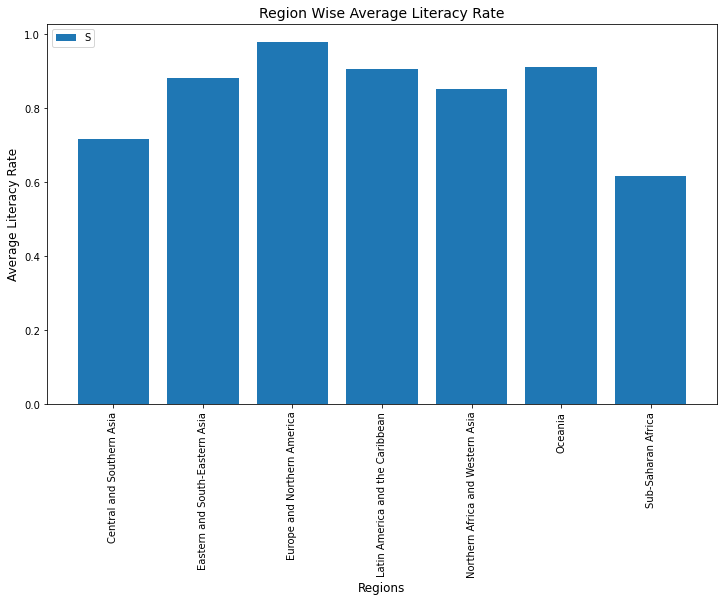

In [15]:
plt.figure(figsize=(12,7))
plt.title("Region Wise Average Literacy Rate",fontsize=14)
plt.bar(region_literacy_rate['Region'],region_literacy_rate['Literacy rate'])
plt.xticks(rotation='vertical')
plt.xlabel("Regions",fontsize=12)
plt.ylabel("Average Literacy Rate",fontsize=12)
plt.legend("Single valued bar chart",loc="upper left")
# plt.legend(loc="lower right")
plt.show()

# <h4>Q4. Create a new column Age_Group and find Age_Group wise Literacy rate?</h4>

In [16]:
df['Age'].unique()

array(['15+', '15-24', '25-64', '65+'], dtype=object)

In [17]:
def age_group(x):
    if x=='15+':
        return 'Teenager'
    elif x=='15-24':
        return 'Young'
    elif x=='25-64':
        return 'Adult'
    else:
        return 'Old'

In [18]:
df['Age_Group']=df['Age'].apply(age_group)

In [19]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,Young
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,Young


In [20]:
df.groupby('Age_Group')['Literacy rate'].mean().reset_index()

,Age_Group,Literacy rate
0,Adult,0.843873
1,Old,0.647954
2,Teenager,0.853163
3,Young,0.919181


In [21]:
df.Year.unique()

array([2011, 2018, 2012, 2013, 2014, 2015, 2016, 2017, 2010], dtype=int64)

# <h4>Q5. Gender wise average Literacy rate?</h4>

In [22]:
df.groupby('Gender')['Literacy rate'].mean()

Gender
female    0.781031
male      0.854071
total     0.815761
Name: Literacy rate, dtype: float64

In [23]:
df.Gender.unique()

array(['female', 'male', 'total'], dtype=object)

In [24]:
df.head(10)

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,Young
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,Young
5,5,Central and Southern Asia,Afghanistan,2011,15-24,total,0.469900,Young
6,6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128,Adult
7,7,Central and Southern Asia,Afghanistan,2011,25-64,male,0.377948,Adult
8,8,Central and Southern Asia,Afghanistan,2011,25-64,total,0.231536,Adult
9,9,Central and Southern Asia,Afghanistan,2011,65+,female,0.196705,Old


In [25]:
df['Gender']=df['Gender'].replace('Male+Female','others')

In [26]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,Young
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,Young


# <h4>Q6. Year wise average Literacy rate?</h4> 

In [27]:
year_lit=df.groupby('Year')['Literacy rate'].mean().reset_index()
year_lit1=year_lit.sort_values(by=['Literacy rate'],ascending=False)
year_lit1

,Year,Literacy rate
6,2016,0.869127
1,2011,0.850409
4,2014,0.825310
5,2015,0.823136
3,2013,0.809273
7,2017,0.803394
8,2018,0.802204
0,2010,0.796784
2,2012,0.779850


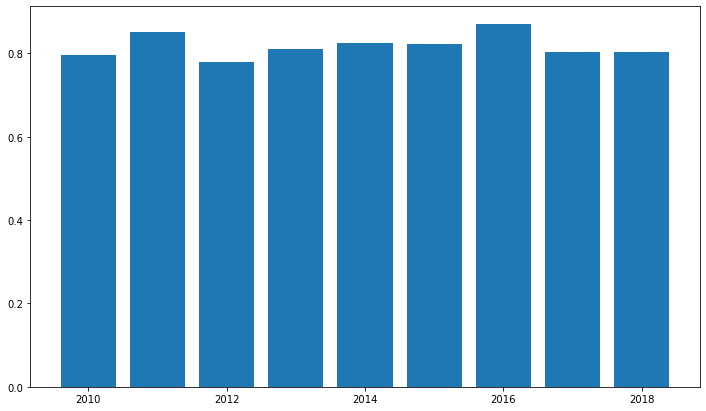

In [28]:
plt.figure(figsize=(12,7))
plt.bar(year_lit['Year'],year_lit['Literacy rate'])
plt.show()

In [29]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,Young
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,Young


In [30]:
df.Region.unique()

array(['Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Europe and Northern America', 'Latin America and the Caribbean',
       'Northern Africa and Western Asia', 'Oceania',
       'Sub-Saharan Africa'], dtype=object)

In [31]:
pd.pivot_table(data=df,index='Region',columns=['Age_Group'],values=['Literacy rate'],aggfunc='mean')

Literacy rate                              
Age_Group                                Adult       Old  Teenager     Young
Region                                                                      
Central and Southern Asia             0.719877  0.507830  0.753805  0.886825
Eastern and South-Eastern Asia        0.917781  0.696354  0.914152  0.965129
Europe and Northern America           0.990584  0.948370  0.982625  0.994472
Latin America and the Caribbean       0.934212  0.779036  0.931686  0.980961
Northern Africa and Western Asia      0.904772  0.631803  0.905557  0.962445
Oceania                               0.935624  0.815943  0.934925  0.960639
Sub-Saharan Africa                    0.632766  0.386301  0.674521  0.767625

In [32]:
#describe function on Literacy rate column
df['Literacy rate'].describe()

count    4955.000000
mean        0.816947
std         0.232560
min         0.004025
25%         0.722507
50%         0.930676
75%         0.985078
max         1.000000
Name: Literacy rate, dtype: float64

In [33]:
year_literacy=df.groupby('Year')['Literacy rate'].mean().reset_index()

In [34]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,Young
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,Young


<AxesSubplot:xlabel='Age_Group', ylabel='count'>

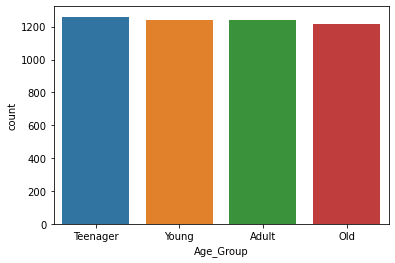

In [35]:
#Age_Group wise no. of literacy rate
sns.countplot(x='Age_Group',data=df)
# plt.show()

In [36]:
#Gender wise age count
gender_count=df.groupby('Gender')['Age'].count().reset_index()
gender_count.rename(columns={'Age':'Total'},inplace=True)
gender_count

,Gender,Total
0,female,1652
1,male,1651
2,total,1652


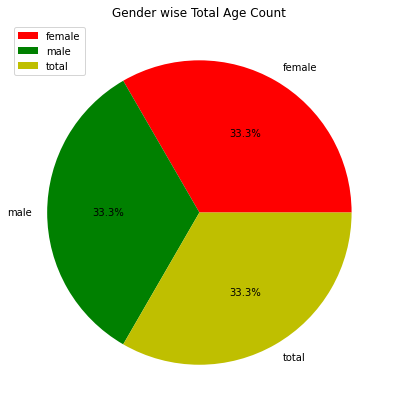

In [37]:
plt.figure(figsize=(12,7))
plt.title("Gender wise Total Age Count")
plt.pie(gender_count['Total'],labels=gender_count['Gender'],colors='rgy',autopct="%0.1f%%")
plt.legend()
plt.show()

In [40]:
df1=df.head(15)
df1

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,Young
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,Young
5,5,Central and Southern Asia,Afghanistan,2011,15-24,total,0.469900,Young
6,6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128,Adult
7,7,Central and Southern Asia,Afghanistan,2011,25-64,male,0.377948,Adult
8,8,Central and Southern Asia,Afghanistan,2011,25-64,total,0.231536,Adult
9,9,Central and Southern Asia,Afghanistan,2011,65+,female,0.196705,Old


In [43]:
pd.pivot_table(df1,index=['Region','Country'],columns=['Year'],values='Literacy rate',aggfunc=[np.sum,np.mean])

sum                mean          
Year                                       2011      2018      2011      2018
Region                    Country                                            
Central and Southern Asia Afghanistan  3.451061  1.845551  0.313733  0.461388

In [49]:
tn_ad=df[(df['Age_Group']=='Adult') | (df['Age_Group']=='Teenager' )]

In [50]:
tn_ad

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
6,6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128,Adult
7,7,Central and Southern Asia,Afghanistan,2011,25-64,male,0.377948,Adult
...,...,...,...,...,...,...,...,...
4944,4944,Sub-Saharan Africa,Zimbabwe,2014,15+,male,0.891854,Teenager
4945,4945,Sub-Saharan Africa,Zimbabwe,2014,15+,total,0.886934,Teenager
4949,4949,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.880485,Adult
4950,4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255,Adult


In [61]:
df2=tn_ad.groupby('Age_Group')['Literacy rate'].mean().reset_index()

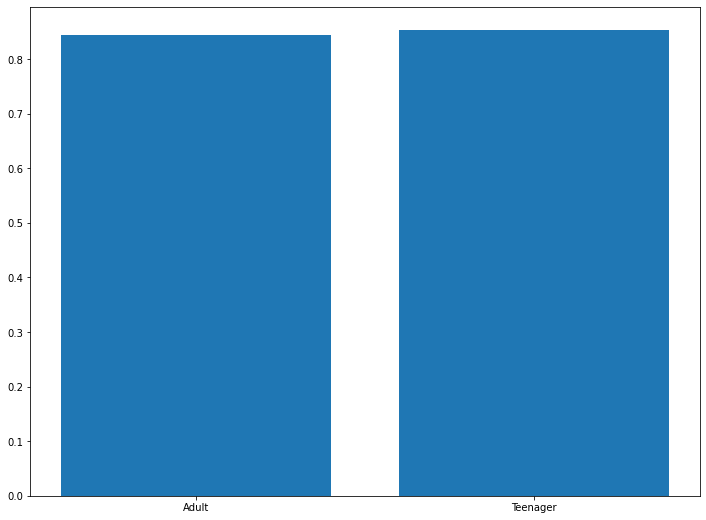

In [62]:
plt.figure(figsize=(12,9))
plt.bar(df2['Age_Group'],df2['Literacy rate'])
plt.show()

In [63]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,Teenager
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,Teenager
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,Young
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,Young


In [68]:
df['Literacy rate'].describe().T

count    4955.000000
mean        0.816947
std         0.232560
min         0.004025
25%         0.722507
50%         0.930676
75%         0.985078
max         1.000000
Name: Literacy rate, dtype: float64

In [70]:
df[df['Literacy rate']<0.30]

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,Teenager
6,6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128,Adult
8,8,Central and Southern Asia,Afghanistan,2011,25-64,total,0.231536,Adult
9,9,Central and Southern Asia,Afghanistan,2011,65+,female,0.196705,Old
10,10,Central and Southern Asia,Afghanistan,2011,65+,total,0.203218,Old
...,...,...,...,...,...,...,...,...
4844,4844,Sub-Saharan Africa,Uganda,2010,65+,female,0.160826,Old
4856,4856,Sub-Saharan Africa,Uganda,2012,65+,female,0.178807,Old
4868,4868,Sub-Saharan Africa,Uganda,2018,65+,female,0.263088,Old
4892,4892,Sub-Saharan Africa,United Republic of Tanzania,2012,65+,female,0.298144,Old


In [73]:
df[(df['Year']==2011) & (df['Age_Group']=='Teenager') & (df['Country']=='India')]

,index,Region,Country,Year,Age,Gender,Literacy rate,Age_Group
143,143,Central and Southern Asia,India,2011,15+,female,0.592773,Teenager
144,144,Central and Southern Asia,India,2011,15+,male,0.788772,Teenager
145,145,Central and Southern Asia,India,2011,15+,total,0.693026,Teenager


In [76]:
pd.pivot_table(df,index=['Country'],columns=['Age'],values='Gender',aggfunc='count',fill_value=0,margins=True)

Age,15+,15-24,25-64,65+,All
Country,,,,,
Afghanistan,6,6,6,5,23
Albania,9,9,9,9,36
Algeria,3,3,3,3,12
Angola,3,3,3,3,12
Antigua and Barbuda,6,0,0,0,6
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),9,9,9,9,36
Viet Nam,3,3,3,3,12
Zambia,6,6,6,6,24


In [92]:
r=df[(df['Region']=='Central and Southern Asia') & (df['Age']=="65+")]
d1=r.groupby(['Region','Country'])['Age'].count().reset_index()
d1.rename(columns={'Age':'Total(Age 65+)'},inplace=True)
d1

,Region,Country,Total(Age 65+)
0,Central and Southern Asia,Afghanistan,5
1,Central and Southern Asia,Bangladesh,24
2,Central and Southern Asia,Bhutan,6
3,Central and Southern Asia,India,6
4,Central and Southern Asia,Iran (Islamic Republic of),12
5,Central and Southern Asia,Kazakhstan,3
6,Central and Southern Asia,Kyrgyzstan,3
7,Central and Southern Asia,Maldives,6
8,Central and Southern Asia,Nepal,6
9,Central and Southern Asia,Pakistan,18


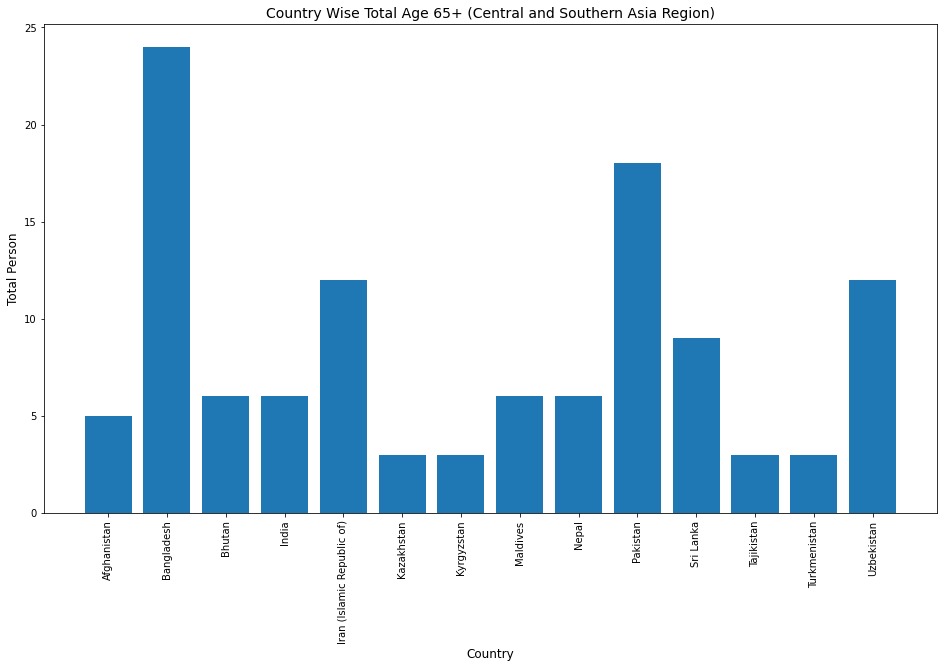

In [100]:
plt.figure(figsize=(16,9))
plt.title("Country Wise Total Age 65+ (Central and Southern Asia Region)",fontsize=14)
plt.bar(d1['Country'],d1['Total(Age 65+)'])
plt.xticks(rotation='vertical')
plt.xlabel("Country",fontsize=12)
plt.ylabel('Total Person',fontsize=12)
plt.show()